In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

names_columns = ['erythema', 'scaling', 'def_borders', 'itching', 'koebner_phen', 'poly_papules',
                 'fol_papules', 'oral_muc_inv', 'knee_elbow_inv', 'scalp_inv', 'family_history',
                 'melanin_incont', 'eos_infiltrate', 'pnl_infiltrate', 'fibrosis_papil_derm', 
                 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'club_rete_ridges', 
                 'elong_rete_ridges', 'thinning_supra_epid', 'spongiform_pustule', 'munro_microabcess', 
                 'focal_hypergran', 'dis_granular_layer', 'vac_damage_basal', 'spongiosis', 'saw_tooth_retes', 
                 'fol_horn_plug', 'perifol_parakeratosis', 'inflam_mono_inf', 'band_like_inf', 'age', 'Class']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Análise inicial dos dados**

- Função que retorna as matrizes de covariância e correlação de um conjunto de dados

In [ ]:
def create_matrices(df, u_vector):
  attrs = df.columns.to_list()
  n_attrs = len(attrs)
  mtrx_cov = np.zeros(shape=(n_attrs, n_attrs))
  mtrx_corr = np.zeros(shape=(n_attrs, n_attrs))
  for i in range(0, n_attrs):
    for j in range(i, n_attrs):
      sum_attr1 = df.apply(lambda row: row[attrs[i]] - u_vector[attrs[i]], axis=1)
      sum_attr2 = df.apply(lambda row: row[attrs[j]] - u_vector[attrs[j]], axis=1)
      cov = (sum_attr1 * sum_attr2).sum() / (df.shape[0] - 1)
      corr = cov / (df[attrs[i]].std() * df[attrs[j]].std())
      mtrx_cov[i,j] = mtrx_cov[j,i] = cov
      mtrx_corr[i,j] = mtrx_corr[j,i] = corr
  df_cov = pd.DataFrame(mtrx_cov, index=attrs, columns=attrs)
  df_corr = pd.DataFrame(mtrx_corr, index=attrs, columns=attrs)
  return df_cov, df_corr


def reset_dataset():
  # derma = pd.read_csv('dermatology.csv') # Lê o dataset
  derma = pd.read_csv("https://raw.githubusercontent.com/cardosorrenan/reconhecimentopadroes-ufc/master/datasets/dermatology.csv")
  derma.columns = names_columns # Seta o nome das colunas
  age_avg = round(pd.to_numeric(derma['age'], errors='coerce').dropna().mean(), 0) #   Substitui os ? da coluna
  derma['age'] = pd.to_numeric(derma['age'], errors='coerce').fillna(age_avg)      # 'idade' pela sua média
  derma = derma.sample(frac=1) # Embaralha o dataset
  derma = derma.reset_index(drop=True)
  return derma

In [ ]:
derma = reset_dataset()

derma1 = derma[derma['Class'] == 1]
derma2 = derma[derma['Class'] == 2]
derma3 = derma[derma['Class'] == 3]
derma4 = derma[derma['Class'] == 4]
derma5 = derma[derma['Class'] == 5]
derma6 = derma[derma['Class'] == 6]

del derma1['Class']
del derma2['Class']
del derma3['Class']
del derma4['Class']
del derma5['Class']
del derma6['Class']

u1_vector = derma1.mean()
u2_vector = derma2.mean()
u3_vector = derma3.mean()
u4_vector = derma4.mean()
u5_vector = derma5.mean()
u6_vector = derma6.mean()

v1_vector = derma1.var()
v2_vector = derma2.var()
v3_vector = derma3.var()
v4_vector = derma4.var()
v5_vector = derma5.var()
v6_vector = derma6.var()

cov1, corr1 = create_matrices(derma1, u1_vector)
cov2, corr2 = create_matrices(derma2, u2_vector)
cov3, corr3 = create_matrices(derma3, u3_vector)
cov4, corr4 = create_matrices(derma4, u4_vector)
cov5, corr5 = create_matrices(derma5, u5_vector)
cov6, corr6 = create_matrices(derma6, u6_vector)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


- Que informação, sobre os atributos, é obtida através da matriz de correlação?

A matriz de correlação auxilia em determinar a relação (-1 < corr < 1) entre os dois atributos, podemos observar melhor atráves de um mapa de calor todas essas conexões de causa e efeito entre os dados (logo abaixo), sendo assim, da figura podemos extrair quais são os atributos que possuem uma 'forte conexão', positivamente, onde os dois cresceriam juntos, ou negativamente, onde seria observados um decaimento mútuo.

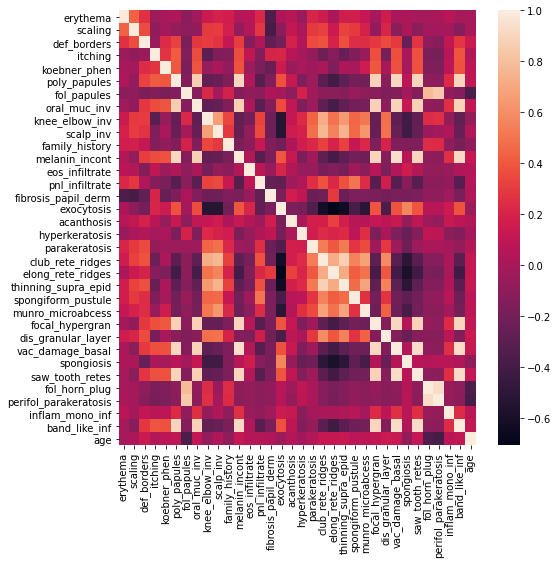

In [ ]:
df = derma.drop('Class', axis=1)
cov, corr = create_matrices(df, df.mean())
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.gcf().set_size_inches(8, 8)

In [ ]:
corr_s = corr.unstack().sort_values(kind="quicksort")
result = pd.Series()
for i, val in enumerate(corr_s.tolist()):
  if (corr_s.index[i][0] != corr_s.index[i][1]):
    row = f'{corr_s.index[i][0]} - {corr_s.index[i][1]}'
    result.loc[row] = val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  



#### **Os 10 atributos mais correlacionados positivamente**

In [ ]:
result[-10:].sort_values(ascending=False)

melanin_incont - vac_damage_basal        0.941623
vac_damage_basal - melanin_incont        0.941623
vac_damage_basal - saw_tooth_retes       0.938359
saw_tooth_retes - vac_damage_basal       0.938359
vac_damage_basal - band_like_inf         0.937521
band_like_inf - vac_damage_basal         0.937521
fol_horn_plug - perifol_parakeratosis    0.928918
perifol_parakeratosis - fol_horn_plug    0.928918
band_like_inf - saw_tooth_retes          0.928703
saw_tooth_retes - band_like_inf          0.928703
dtype: float64

#### **Os 10 atributos mais correlacionados negativamente**

In [ ]:
result[0:10]

exocytosis - elong_rete_ridges     -0.707813
elong_rete_ridges - exocytosis     -0.707813
thinning_supra_epid - exocytosis   -0.631516
exocytosis - thinning_supra_epid   -0.631516
exocytosis - club_rete_ridges      -0.625530
club_rete_ridges - exocytosis      -0.625530
elong_rete_ridges - spongiosis     -0.583316
spongiosis - elong_rete_ridges     -0.583316
knee_elbow_inv - exocytosis        -0.533249
exocytosis - knee_elbow_inv        -0.533249
dtype: float64

### **Classificadores Bayesianos**

#### **Métodos construídos para classificação**
 - Obs: Nessa parte será usada a própria função do pandas (df.corr) para obter a matriz de covariância, devido somente a performance

In [ ]:
det = lambda x: np.linalg.det(x)
inv = lambda x: np.linalg.inv(x)
arr = lambda x: np.array(x)
log = lambda x: np.log(x)


def split_folds(n_fold):
  derma['fold'] = pd.DataFrame(data=[-1]*derma.shape[0])  # Todas as linhas da coluna 'fold' recebe -1, pois ainda não pertencem a nenhum fold
  samples = math.floor(derma.shape[0]/n_fold)           # Quantidade de amostras em cada fold
  for fold in list(range(0, n_fold)):                     # Como K=10, cada linha pertencerá a um fold [0, 1, ..., 9] 
    base = fold*samples
    top = fold*samples + samples - 1
    derma.loc[base:top, 'fold'] = fold     # 0-16 será 0-Fold / 17-33 será 1-Fold / ... / 153-169 será 10-Fold
  return derma


def z_score(column):
  if (column.name != 'Class' and column.name != 'fold'):
    mean = column.mean()
    std_dev = column.std()
    column = column.apply(lambda x: (x - mean)/std_dev)

  return column
  

def split_normalize_dataset(fold):
  train_x = {
    'class_1': derma.query(f'fold != {fold}').apply(z_score).query('Class == 1').drop(['Class', 'fold'], axis=1),
    'class_2': derma.query(f'fold != {fold}').apply(z_score).query('Class == 2').drop(['Class', 'fold'], axis=1),
    'class_3': derma.query(f'fold != {fold}').apply(z_score).query('Class == 3').drop(['Class', 'fold'], axis=1),
    'class_4': derma.query(f'fold != {fold}').apply(z_score).query('Class == 4').drop(['Class', 'fold'], axis=1),
    'class_5': derma.query(f'fold != {fold}').apply(z_score).query('Class == 5').drop(['Class', 'fold'], axis=1),
    'class_6': derma.query(f'fold != {fold}').apply(z_score).query('Class == 6').drop(['Class', 'fold'], axis=1)
  }
  train_y = derma.query(f'fold != {fold}')['Class']
  test_x = derma.query(f'fold == {fold}').drop(['Class', 'fold'], axis=1).apply(z_score)
  test_y = derma.query(f'fold == {fold}')['Class']
  return train_x, train_y, test_x, test_y


def get_mean_vector(train_x):
  return {
    'class_1': train_x['class_1'].mean(),
    'class_2': train_x['class_2'].mean(),
    'class_3': train_x['class_3'].mean(),
    'class_4': train_x['class_4'].mean(),
    'class_5': train_x['class_5'].mean(),
    'class_6': train_x['class_6'].mean()
  }


def get_matrices_cov(train_x):
  cov1 = train_x['class_1'].cov()
  cov2 = train_x['class_2'].cov()
  cov3 = train_x['class_3'].cov()
  cov4 = train_x['class_4'].cov()
  cov5 = train_x['class_5'].cov()
  cov6 = train_x['class_6'].cov()
  return {
    'class_1': cov1 + np.identity(cov1.shape[0])*0.01,
    'class_2': cov2 + np.identity(cov2.shape[0])*0.01,
    'class_3': cov3 + np.identity(cov3.shape[0])*0.01,
    'class_4': cov4 + np.identity(cov4.shape[0])*0.01,
    'class_5': cov5 + np.identity(cov5.shape[0])*0.01,
    'class_6': cov6 + np.identity(cov6.shape[0])*0.01
  }


def get_prob_priori(train_x):
  len_x1 = train_x['class_1'].shape[0]
  len_x2 = train_x['class_2'].shape[0]
  len_x3 = train_x['class_3'].shape[0]
  len_x4 = train_x['class_4'].shape[0]
  len_x5 = train_x['class_5'].shape[0]
  len_x6 = train_x['class_6'].shape[0]
  len_total = len_x1 + len_x2 + len_x3 + len_x4 + len_x5 + len_x6
  return {
    'class_1': len_x1/len_total,
    'class_2': len_x2/len_total,
    'class_3': len_x3/len_total,
    'class_4': len_x4/len_total,
    'class_5': len_x5/len_total,
    'class_6': len_x6/len_total
  }
  

def QDA(test_row, mean, cov, priori):
  v1 = log(det(cov['class_1'])) + arr(test_row - mean['class_1'].T).T @ inv(cov['class_1']) @ arr(test_row - mean['class_1']).T - 2*log(priori['class_1'])
  v2 = log(det(cov['class_2'])) + arr(test_row - mean['class_2'].T).T @ inv(cov['class_2']) @ arr(test_row - mean['class_2']).T - 2*log(priori['class_2'])
  v3 = log(det(cov['class_3'])) + arr(test_row - mean['class_3'].T).T @ inv(cov['class_3']) @ arr(test_row - mean['class_3']).T - 2*log(priori['class_3'])
  v4 = log(det(cov['class_4'])) + arr(test_row - mean['class_4'].T).T @ inv(cov['class_4']) @ arr(test_row - mean['class_4']).T - 2*log(priori['class_4'])
  v5 = log(det(cov['class_5'])) + arr(test_row - mean['class_5'].T).T @ inv(cov['class_5']) @ arr(test_row - mean['class_5']).T - 2*log(priori['class_5'])
  v6 = log(det(cov['class_6'])) + arr(test_row - mean['class_6'].T).T @ inv(cov['class_6']) @ arr(test_row - mean['class_6']).T - 2*log(priori['class_6'])
  v = [v1, v2, v3, v4, v5, v6]
  predicted = v.index(min(v)) + 1
  return predicted


def NAIVE(test_row, mean, cov, priori):
  v1 = log(det(cov['class_1']*np.identity(cov['class_1'].shape[0]))) + arr(test_row - mean['class_1'].T).T @ inv(cov['class_1']*np.identity(cov['class_1'].shape[0])) @ arr(test_row - mean['class_1']).T - 2*log(priori['class_1'])
  v2 = log(det(cov['class_2']*np.identity(cov['class_2'].shape[0]))) + arr(test_row - mean['class_2'].T).T @ inv(cov['class_2']*np.identity(cov['class_2'].shape[0])) @ arr(test_row - mean['class_2']).T - 2*log(priori['class_2'])
  v3 = log(det(cov['class_3']*np.identity(cov['class_3'].shape[0]))) + arr(test_row - mean['class_3'].T).T @ inv(cov['class_3']*np.identity(cov['class_3'].shape[0])) @ arr(test_row - mean['class_3']).T - 2*log(priori['class_3'])
  v4 = log(det(cov['class_4']*np.identity(cov['class_4'].shape[0]))) + arr(test_row - mean['class_4'].T).T @ inv(cov['class_4']*np.identity(cov['class_4'].shape[0])) @ arr(test_row - mean['class_4']).T - 2*log(priori['class_4'])
  v5 = log(det(cov['class_5']*np.identity(cov['class_5'].shape[0]))) + arr(test_row - mean['class_5'].T).T @ inv(cov['class_5']*np.identity(cov['class_5'].shape[0])) @ arr(test_row - mean['class_5']).T - 2*log(priori['class_5'])
  v6 = log(det(cov['class_6']*np.identity(cov['class_6'].shape[0]))) + arr(test_row - mean['class_6'].T).T @ inv(cov['class_6']*np.identity(cov['class_6'].shape[0])) @ arr(test_row - mean['class_6']).T - 2*log(priori['class_6'])
  v = [v1, v2, v3, v4, v5, v6]
  predicted = v.index(min(v)) + 1
  return predicted


def LDA(test_row, mean, s_w):
  v1 = arr(test_row - mean['class_1'].T).T @ inv(s_w) @ arr(test_row - mean['class_1']).T
  v2 = arr(test_row - mean['class_2'].T).T @ inv(s_w) @ arr(test_row - mean['class_2']).T
  v3 = arr(test_row - mean['class_3'].T).T @ inv(s_w) @ arr(test_row - mean['class_3']).T
  v4 = arr(test_row - mean['class_4'].T).T @ inv(s_w) @ arr(test_row - mean['class_4']).T
  v5 = arr(test_row - mean['class_5'].T).T @ inv(s_w) @ arr(test_row - mean['class_5']).T
  v6 = arr(test_row - mean['class_6'].T).T @ inv(s_w) @ arr(test_row - mean['class_6']).T
  v = [v1, v2, v3, v4, v5, v6]
  predicted = v.index(min(v)) + 1
  return predicted

#### **Loop principal**

In [ ]:
derma = reset_dataset()
n_folds = 5
derma = split_folds(n_folds)

acc_total_qda = 0
acc_total_nb = 0
acc_total_lda = 0
for validation in list(range(0, n_folds)):
  acc_qda = 0
  acc_nb = 0
  acc_lda = 0
  train_x, train_y, test_x, test_y = split_normalize_dataset(validation)
  means = get_mean_vector(train_x)
  covs = get_matrices_cov(train_x)
  probs_priori = get_prob_priori(train_x)

  s_w = (covs['class_1'] + covs['class_2'] + covs['class_3'] + covs['class_4'] + covs['class_5'] + covs['class_6'])/6;

  for i, row in test_x.iterrows():
    real = test_y[i]
    predicted_qda = QDA(row, means, covs, probs_priori)
    predicted_nb = NAIVE(row, means, covs, probs_priori)
    predicted_lda = LDA(row, means, s_w)
    acc_qda += 1 if (real == predicted_qda) else 0
    acc_nb += 1 if (real == predicted_nb) else 0
    acc_lda += 1 if (real == predicted_lda) else 0

  print(f'fold-{validation}:')
  print(f' QDA: {acc_qda}/{test_y.shape[0]}')
  print(f' NB: {acc_nb}/{test_y.shape[0]}')
  print(f' LDA: {acc_lda}/{test_y.shape[0]}\n')
  acc_total_qda += round(acc_qda/test_y.shape[0] * 100, 2)
  acc_total_nb += round(acc_nb/test_y.shape[0] * 100, 2)
  acc_total_lda += round(acc_lda/test_y.shape[0] * 100, 2)

print('Accuracy Total:')
print(f' Quadratic Discriminant: {round(acc_total_qda/n_folds, 2)}%')
print(f' Naive-Bayes: {round(acc_total_nb/n_folds, 2)}%')
print(f' Linear Discriminant: {round(acc_total_lda/n_folds, 2)}%')

fold-0:
 QDA: 72/73
 NB: 71/73
 LDA: 70/73

fold-1:
 QDA: 67/73
 NB: 68/73
 LDA: 69/73

fold-2:
 QDA: 72/73
 NB: 69/73
 LDA: 72/73

fold-3:
 QDA: 69/73
 NB: 68/73
 LDA: 71/73

fold-4:
 QDA: 71/73
 NB: 67/73
 LDA: 72/73

Accuracy Total:
 Quadratic Discriminant: 96.16%
 Naive-Bayes: 93.97%
 Linear Discriminant: 96.99%


- Qual classificador obteve a melhor taxa de acerto (precisão, acurácia) média?

Após realizar diversos testes, observa-se que:

    - A taxa de acerto dos 3 classificadores oscilam entre os números: 92% e 97% 
    - Sem nenhuma disparidade relevante entre LDA e QDA
    - Naive-Bayes sempre com menor taxa



- Pode-se considerar esse problema linearmente separável? Justifique.

Levando em consideração a alta acurácia obtida nos resultados, podemos considerar que sim.

### **LDA (CDA) como transformação linear**

In [13]:
'''
testes

from numpy import linalg as LA

s_b1 = derma1.shape[0]*(u1_vector - u_df)*((u1_vector - u_df).T)
s_b2 = derma2.shape[0]*(u2_vector - u_df)*((u2_vector - u_df).T)
s_b3 = derma3.shape[0]*(u3_vector - u_df)*((u3_vector - u_df).T)
s_b4 = derma4.shape[0]*(u4_vector - u_df)*((u4_vector - u_df).T)
s_b5 = derma5.shape[0]*(u5_vector - u_df)*((u5_vector - u_df).T)
s_b6 = derma6.shape[0]*(u6_vector - u_df)*((u6_vector - u_df).T)
s_b = s_b1 + s_b2 + s_b3 + s_b4 + s_b5 + s_b6

s_w_inv = np.linalg.inv(s_w)
eig_values, eig_vectors = np.linalg.eig(s_w_inv*np.array(s_b))
teste = (derma1 - u1_vector @ s_w_inv) @ (derma1 - u1_vector).T

:(

'''
True

True